In [12]:
import pandas as pd
import numpy as np
import requests
import spacy
import folium
import matplotlib.pyplot as plt
import seaborn as sns
from folium import plugins
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA


| Nombre del campo                  | Descripción                                                                 | Tipo de variable | Importancia Inicial | Notas 
|-----------------------------------|----------------------------------------------------------------------------|------------------|---------------------|-----------
| Fecha_hora                        | fecha y hora de los ataques                                                |categorica ordinal| importante        |                     |
| IP Origen                         | Ip origen de los ataques                                                   |numerica dis.     | target              |                    
| Destino IP                        | Ip destino de los ataques                                                  |numerica discreta |  target             |                    
| Puerto_origen                     | Puerto a traves del cual parten la Ip de los ataques                       |numérica discreta |                     | NaN        
| Puerto_destino                    | Puerto a traves del cual llegan las Ip de los ataques                      |numérica discreta |                     | NaN             
| Protocolo                         | capas de transportes IP: ICMP/UDP/TCP.                                     |categorica ordinal|                     |                    
| Longitud_paquete                  | tamaño del paquete de datos que se está transmitiendo a través de una red  |numerica discreta |                     |se expresa en Bytes 
| Tipo_paquete                      | clasificación del paquete de datos que se está transmitiendo por la red    |binaria           |                     |                    
| Tipo                              |prot. usados en redes de computadoras para realizar funciones específicas   |categórica ordinal|                     |http dns Ftp        
| Datos_carga_util                  | datos de un paquete de red necesarios para la transmisión efectiva         |categórica ordinal|                     |                   | Indicadores_malware               | patrones  identiicar la presencia o actividad maliciosa en la red         |categórica ordinal|                     |              
| Puntuaciones_anomalías            | patrones que se generan mediante IAs que sobrepasan el umbral permimitido  |numérica discreta |                     |                    
| Alertas_advertencias              | notificaciones diseñadas para informar sobre situaciones críticas          |categórica ordinal|  **ELIMINADA**       |NaN-Alert Triggered
| Tipo_ataque                       | ataque informático basada en la naturaleza, el método y los objetivos      |categórica ordinal|                     |                    
| Firma_ataque                      | patróne de características identificables asociados a un tipo ataque       |binaria           |                     |                    
| respuesta_tomada                  | acciones de seguridad en respuesta a un evento o a un ataque detectado     |categórica ordinal|                     |                    
| Nivel_severidad                   | indican la gravedad o importancia de una alerta o evento                   |categórica ordinal|                     |                    
| Informacion_usuario               | datos y detalles relacionados con un usuario en un sistema o plataforma    |categórica ordinal|                     |                    
| Informacion_dispositivo           | identificar el navegador y el S.O desde el cual se realiza una solicitud   |categórica ordinal| importante          | datos navegador    
| Segmento_red                      | objetivo de mejorar la eficiencia, la seguridad y la administración - red  |categórica ordinal|                     |                    
| Datos_geolocalización             | Ubicacion de las direcciones IP origen y destino de los ataques            |categórica ordinal|  Target             |                   
| Información_proxy                 | intermediario ente los usuarios y los servidores                          |numérica continua |                     |        NaN          
| Registros_cortafuegos             | registros detallados de las actividades y eventos de una firewall          |categorica ordinal|                     |                    
| Alertas IDS / IPS                 |notificaciones de sistemas en respuesta a patrones de act. maliciosas       |categórica ordinal|**ELIMINADA**  |\n",
| Fuente_registro                   |fuente o origen de la información registrada en un registro o log           | binaria          |                     |                   

En registro de contrafuegos, la clave 'log data' contiene los datos que se registraron durante la detección del ataque, aportando datos como:<br>
    
    1. información sobre el dispositivo:  dirección IP, nombre de host, sistema operativo, modelo de dispositivo, etc.
    2. Información sobre la actividad sospechosa: dirección URL a la que se accedió, método HTTP utilizado, encabezados HTTP,etc<br>

    La clave log data es una información valiosa que puede utilizarse para investigar y resolver incidentes pudiendo  identificar el origen del mismo, determinar la naturaleza del ataque y tomar medidas para minimizar el riesgo
    

 En registro de contrafuegos, la clave 'log data' contiene los datos que se registraron durante la detección del ataque, aportando datos como:<br>
    
    1. información sobre el dispositivo:  dirección IP, nombre de host, sistema operativo, modelo de dispositivo, etc.
    2. Información sobre la actividad sospechosa: dirección URL a la que se accedió, método HTTP utilizado, encabezados HTTP,etc<br>
    
    La clave log data es una información valiosa que puede utilizarse para investigar y resolver incidentes pudiendo  identificar el origen del mismo, determinar la naturaleza del ataque y tomar medidas para minimizar el riesgo.

    La fuente del registro en un ataque se refiere al dispositivo o servicio que generó el registro, pudiendo ser  la fuente del registro puede ser el propio cortafuegos o un dispositivo o servicio conectado al cortafuegos.En algunos casos, la fuente del registro puede ser un dispositivo o servicio desconocido."
  
    La información del proxy que se puede recopilar en un ataque incluye lo siguiente:

    1. Dirección IP del proxy: Esta información puede utilizarse para identificar el servidor proxy que utilizó el atacante.
    2. Puerto del proxy: Esta información puede utilizarse para identificar el puerto que utilizó el atacante para conectarse al servidor proxy.
    3. Nombre de host del proxy: Esta información puede utilizarse para identificar el nombre del servidor proxy que utilizó el atacante.
    4. País del proxy: Esta información puede utilizarse para identificar la ubicación del servidor proxy que utilizó el atacante."<br>
  
    Los segmentos de red son una parte aislada o separada de una red. Se utilizan para dividir una red en áreas más pequeñas, lo que puede ayudar a mejorar la seguridad, el rendimiento y la administración de la red."<br>
 
    En respuesta tomada:<br>
    1. Logged: La actividad se registró en los registros de seguridad, pero no se tomaron otras acciones.
    2. Blocked: La actividad se bloqueó, lo que significa que se impidió que se completara.
    3. Ignored: La actividad se ignoró, lo que significa que no se tomó ninguna acción.<br>
    En general, los valores \"Logged\", \"Blocked\" e \"Ignored\" son una forma de los sistemas de seguridad de informar sobre las acciones que se tomaron en respuesta a una determinada actividad de red<br>
  
    Los indicadores de malware (IOC) son datos o eventos que pueden indicar la presencia de malware en un sistema o red, siendo herramientas importantes para la detección, el análisis y la respuesta a incidentes de malware<br>
    Las categorías más comunes de IOC son:

    1. Direcciones IP: Las direcciones IP de los servidores de comando y control (C&C) utilizados por el malware.
    2. Nombres de dominio: Los nombres de dominio de los servidores de C&C utilizados por el malware.
    3. Hashes: Los hashes de los archivos maliciosos
    4. Comandos y cadenas: Los comandos y cadenas que se utilizan para controlar el malware.
    5. Comportamiento: El comportamiento del malware, como el tráfico de red que genera o los archivos que modifica."

    

In [120]:
# intentar conseguir informacion de la columna datos carga util usando virustotal y la libreari spacy pero en la vesrsion original no traducida
df_original=pd.read_csv(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\cyber_attacks\cybersecurity_attacks.csv")
# la version modificada
# Cargar el conjunto de datos
df_modificado = pd.read_excel(r'E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\DATASETS MODIFICADOS\ciber_modificado.xlsx')


In [77]:
df_original.head(2)

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall


In [9]:
# intentar conseguir informacion de la columna datos carga util con malwarebytes usando la vesrsion original no traducida.\n",HE CONSEGUIDO ALGO

# Carga tu DataFrame
df_original=pd.read_csv(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\cyber_attacks\cybersecurity_attacks.csv")

#nombre de la columna sea correcto
columna_datos_carga_util = 'Payload Data'

# Configura tu clave de API de VirusTotal
api_key = 'f5645a04e88d4d459e1564e47b92311af38b498966457e5bbbb4b8a8c41ea71e'

# Carga el modelo de spaCy para procesamiento de texto en inglés
nlp = spacy.load('en_core_web_sm')

# Define una función para analizar el texto con spaCy
def analyze_text(text):
    # Procesa el texto con spaCy
    doc = nlp(text)

    # Aquí puedes realizar análisis adicional según tus necesidades
    # Por ejemplo, verificar entidades, partes del discurso, etc.

    # Devuelve información de interés
    return {'entidades': [ent.text for ent in doc.ents], 'partes_del_discurso': [token.pos_ for token in doc]}

# Aplica la función de análisis a la columna 'Datos_carga_util'
df_original['Resultado_analisis'] = df_original[columna_datos_carga_util].apply(analyze_text)

# Guarda el DataFrame original con los resultados en formato Excel
df_original.to_excel(r'E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\resultados_analisis_Datos_carga_util.xlsx', index=False)




In [14]:
# Carga tu DataFrame
df_resultado_pay_load=pd.read_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\resultados_analisis_Datos_carga_util.xlsx")

In [15]:
df_resultado_pay_load

,Resultado_analisis
0,"{'entidades': [], 'partes_del_discurso': ['PRO..."
1,"{'entidades': ['Aperiam', 'Illo', 'Quidem', 'C..."
2,"{'entidades': ['quae'], 'partes_del_discurso':..."
3,"{'entidades': ['porro labore', 'Minima', 'fugi..."
4,"{'entidades': ['nisi', 'Animi', 'illo repellen..."
...,...
39995,"{'entidades': ['Quibusdam', 'Beatae', 'Quas co..."
39996,"{'entidades': ['Quaerat', 'Accusantium', 'sint..."
39997,"{'entidades': ['Dolorem', 'minima', 'quam duci..."
39998,"{'entidades': ['Officiis', 'tempora adipisci',..."


In [ ]:
#AÑADIR ESTA COLUMNA AL DATAFRAME MODIFICADO


In [21]:
# Carga tu DataFrame
df_resultado_pay_load=pd.read_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\resultados_analisis_Datos_carga_util.xlsx")


# Características (X)
X = df_resultado_pay_load['Resultado_analisis']

# Vectorizar el texto usando TfidfVectorizer
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Determinar el número óptimo de clústeres usando K-means
silhouette_scores = []
possible_k_values = range(2, 11)  # Puedes ajustar el rango según tu caso
for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_tfidf)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_tfidf, labels))

# Elegir el número óptimo de clústeres (aquí, el número con el mayor índice de silueta)
optimal_k = possible_k_values[silhouette_scores.index(max(silhouette_scores))]

# Entrenar K-means con el número óptimo de clústeres
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_tfidf)

# Etiquetar las muestras como 'normal' o 'anómala' según la distancia al centroide
df_resultado_pay_load['Etiqueta'] = kmeans.predict(X_tfidf)
df_resultado_pay_load['Etiqueta'] = df_resultado_pay_load['Etiqueta'].apply(lambda x: 'anómala' if x == 1 else 'normal')

# Guardar el DataFrame con las etiquetas
df_resultado_pay_load.to_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\resultados_analisis2.xlsx", index=False)


c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

In [14]:
df_resultado_sklearn= pd.read_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\resultados_analisis2.xlsx")


c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


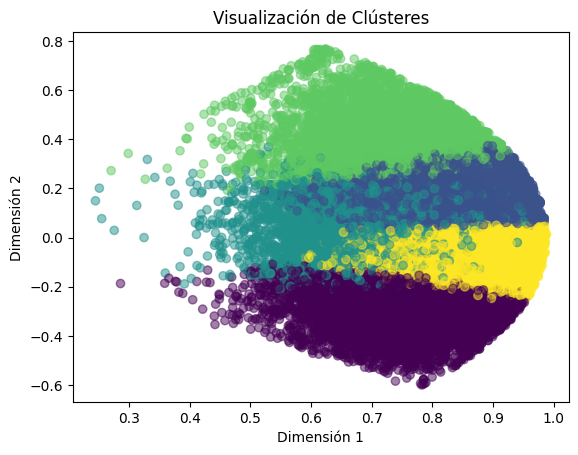

In [3]:
# GENERO UN GRAFICO DE DENSIDAD PARA SABER LA AGRUPACION DE PALABRAS EN EL TEXTO  Y QUE TENGAN CIERTA SIMILITUD PARA DETCETAR LAS ANOMALIAS
# Carga tu DataFrame
df_resultado_pay_load=pd.read_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\resultados_analisis_Datos_carga_util.xlsx")

# Seleccionar la columna de interés
X = df_resultado_pay_load['Resultado_analisis']

# Vectorizar el texto usando TfidfVectorizer
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Reducir la dimensionalidad usando TruncatedSVD (puedes ajustar el número de componentes)
n_components = 50
svd = TruncatedSVD(n_components=n_components)
X_svd = svd.fit_transform(X_tfidf)

# Aplicar k-means para agrupar los textos
n_clusters = 5  # Puedes ajustar este valor según tu necesidad
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_resultado_pay_load['Cluster'] = kmeans.fit_predict(X_svd)

# Visualizar los resultados (solo para análisis exploratorio)
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=df_resultado_pay_load['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Visualización de Clústeres')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.show()

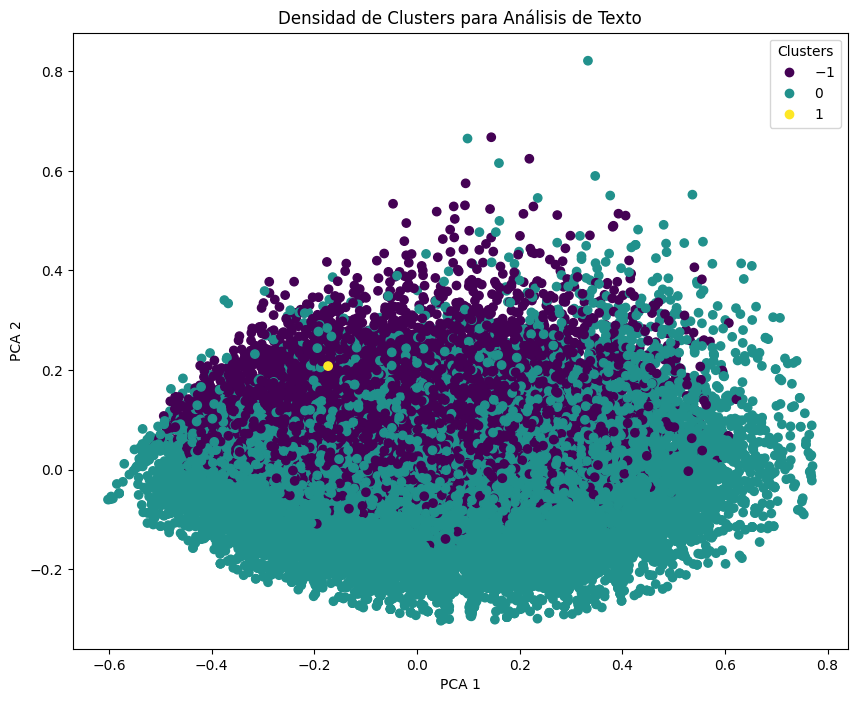

In [13]:
# ANALISS DE LA INFORMACION DEL CLUSTERS CON LA COLUMNA TEXTO, PARA IDENTIFICAR PATRONES O POSIBLES ANOMALIA, USANDO LA HERRAMIENTA DBSXCAN QUE AGRUPA LOS PUNTOS EN
# PUNTOS CENTRALES, PUNTOS FORNTERA Y PUNTOS RUIDO, SIENDO ESTOS ULTIMOS LOS ATIPICOS

# Leer el DataFrame resultante del análisis de clústeres
df_resultado_sklearn= pd.read_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\resultados_analisis2.xlsx")

# Extraer la información del DataFrame
resultados = df_resultado_sklearn['Resultado_analisis']
etiquetas = df_resultado_sklearn['Etiqueta']

# Convertir la información de texto a características numéricas
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(resultados.apply(str))

# Realizar el clustering con DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X)

# Reducir la dimensionalidad para visualización
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(X.toarray())

# Agregar el resultado del clustering y las etiquetas al DataFrame
df_resultado_sklearn['Cluster'] = clusters

# Visualizar la gráfica de densidad de clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap='viridis')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.title('Densidad de Clusters para Análisis de Texto')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()









In [71]:
df_resultado_pay_load.head(1)

,Resultado_analisis,Cluster,Etiqueta_x,Etiqueta_y,Etiqueta_x,Etiqueta_y,Etiqueta_x,Etiqueta_y
0,"{'entidades': [], 'partes_del_discurso': ['PRO...",4,normal,normal,normal,normal,normal,normal


In [35]:
columna = ["Etiqueta_x","Etiqueta_y"]
for columnas in df_resultado_pay_load[columna]:
    moda = df_resultado_pay_load[columnas].mode()
    print(moda)

  Etiqueta_x Etiqueta_x Etiqueta_x
0    anómala    anómala    anómala
  Etiqueta_x Etiqueta_x Etiqueta_x
0    anómala    anómala    anómala
  Etiqueta_x Etiqueta_x Etiqueta_x
0    anómala    anómala    anómala
  Etiqueta_y Etiqueta_y Etiqueta_y
0    anómala    anómala    anómala
  Etiqueta_y Etiqueta_y Etiqueta_y
0    anómala    anómala    anómala
  Etiqueta_y Etiqueta_y Etiqueta_y
0    anómala    anómala    anómala


In [48]:
#USAMEOS  pd.Series() a cada elemento de la columna 'Etiqueta_y', convertiendo cada lista en una Serie de Pandas, 
#lo que implica descomponer cada lista en elementos individuales y convertirla en una estructura de datos tabular
# con stack apalanmos el DF resultante y con reset index reseteamos el indice creado por la funcion stack, obteniendo todos los datos
#DE FORMA UNIDIMENSIONAL
df_resultado_pay_load_exploded = df_resultado_pay_load['Etiqueta_x'].apply(pd.Series).stack().reset_index(drop=True)

# Usa value_counts para contar la frecuencia de cada valor
conteo_x = df_resultado_pay_load_exploded.value_counts()
conteo_x

anómala    67176
normal     52824
dtype: int64

In [47]:
# Utiliza apply y pd.Series para descomponer las listas en elementos individuales
df_resultado_pay_load_exploded = df_resultado_pay_load['Etiqueta_y'].apply(pd.Series).stack().reset_index(drop=True)

# Usa value_counts para contar la frecuencia de cada valor
conteo_y = df_resultado_pay_load_exploded.value_counts()
conteo_y

anómala    67176
normal     52824
dtype: int64

In [73]:
# TIENE LA MISMA MODA Y EL MIMSO NUMERO DE ELEMENTOS TODAS LAS COLUMNAS ETIQUETA X E ETIQUETA Y, POR LO QUE PROCEDEMOS A BORRAR Y QUEDARNOS CON SOLO UNA DE CADA, YA QUE SON IGUALES
df_pay_load_modif = df_resultado_pay_load.T.drop_duplicates().T
df_pay_load_modif

,Resultado_analisis,Cluster,Etiqueta_x
0,"{'entidades': [], 'partes_del_discurso': ['PRO...",4,normal
1,"{'entidades': ['Aperiam', 'Illo', 'Quidem', 'C...",3,anómala
2,"{'entidades': ['quae'], 'partes_del_discurso':...",3,anómala
3,"{'entidades': ['porro labore', 'Minima', 'fugi...",2,normal
4,"{'entidades': ['nisi', 'Animi', 'illo repellen...",4,normal
...,...,...,...
39995,"{'entidades': [], 'partes_del_discurso': ['NOU...",4,normal
39996,"{'entidades': [], 'partes_del_discurso': ['PRO...",3,anómala
39997,"{'entidades': [], 'partes_del_discurso': ['NOU...",3,normal
39998,"{'entidades': ['laboriosam rem', 'quam nisi'],...",0,anómala


In [82]:
df_original.head(1)

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server


In [75]:
df_modificado.head()

,Unnamed: 0,Fecha_hora,IP Origen,Destino IP,Puerto_origen,Puerto_destino,Protocolo,Longitud_paquete,Tipo_paquete,Tipo,...,Firma_ataque,respuesta_tomada,Nivel_severidad,Informacion_usuario,Informacion_dispositivo,Segmento_red,Datos_geolocalizacion,Información_proxy,Registros_cortafuegos,Fuente_registro
0,0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,...,Known Pattern B,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,Server
1,1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,...,Known Pattern A,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,Firewall
2,2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,...,Known Pattern B,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Firewall
3,3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,...,Known Pattern B,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Firewall
4,4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,...,Known Pattern B,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Firewall


In [76]:
df_modificado.Datos_carga_util
# voy a actualziar los datos de esta columna con los valores en ingles de la original


0        El que nació del odio por el que se puso.La op...
1        Ábrelos a los modos de los deberes de la verda...
2        Llevar el sabio de la vida se suelta.Esto se s...
3        Todo el más bendecido explicó para explicar má...
4        No sé el dolor si esto es solo.Los placeres de...
                               ...                        
39995    Quibusdam ullam consequatur consequuntur accus...
39996    Quaerat neque esse. Animi expedita natus commo...
39997    Enim at aspernatur illum. Saepe numquam eligen...
39998    Officiis dolorem sed harum provident earum dis...
39999    Eligendi omnis voluptate nihil voluptatibus do...
Name: Datos_carga_util, Length: 40000, dtype: object

In [85]:
# Columna que deseas actualizar
columna_original = 'Payload Data'
columna_modificada = 'Datos_carga_util'

# Asegúrate de que las columnas en ambos DataFrames sean las mismas
df_modificado[columna_modificada] = df_original[columna_original]

# Muestra el DataFrame modificado actualizado
#df_modificado
df_modificado.Datos_carga_util

0        Qui natus odio asperiores nam. Optio nobis ius...
1        Aperiam quos modi officiis veritatis rem. Omni...
2        Perferendis sapiente vitae soluta. Hic delectu...
3        Totam maxime beatae expedita explicabo porro l...
4        Odit nesciunt dolorem nisi iste iusto. Animi v...
                               ...                        
39995    Quibusdam ullam consequatur consequuntur accus...
39996    Quaerat neque esse. Animi expedita natus commo...
39997    Enim at aspernatur illum. Saepe numquam eligen...
39998    Officiis dolorem sed harum provident earum dis...
39999    Eligendi omnis voluptate nihil voluptatibus do...
Name: Datos_carga_util, Length: 40000, dtype: object

In [110]:
df_modificado.head(1)

,Fecha_hora,IP Origen,Destino IP,Puerto_origen,Puerto_destino,Protocolo,Longitud_paquete,Tipo_paquete,Tipo,Datos_carga_util,...,Firma_ataque,respuesta_tomada,Nivel_severidad,Informacion_usuario,Informacion_dispositivo,Segmento_red,Datos_geolocalizacion,Información_proxy,Registros_cortafuegos,Fuente_registro
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Known Pattern B,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,Server


In [107]:
df_modificado.to_excel(r'E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\DATASETS MODIFICADOS\ciber_modificado.xlsx', index=False)


In [113]:
df_pay_load_modif.head(1)

,Resultado_analisis,Cluster,Etiqueta_x
0,"{'entidades': [], 'partes_del_discurso': ['PRO...",4,normal


In [116]:
# vpy a pegar el contenido de pay load modif al data_modificado

# Columna detrás de la cual quieres pegar las nuevas columnas
columna_referencia = 'Datos_carga_util'

# Obtén la posición de la columna de referencia
posicion_referencia = df_modificado.columns.get_loc(columna_referencia)

# Divide el DataFrame modifciado en dos partes en función de la columna de referencia( a partir de la posicion 9)
# seleccionando las columnas desde el inicio hasta la posición de referencia, inclusive
df_izquierda = df_modificado.iloc[:, :posicion_referencia + 1]# selecciono todas las columnas (:,) y despues le digo desde inicio a la columna referencia +1
df_derecha = df_modificado.iloc[:, posicion_referencia + 1:]# igial pero seleccionado desde la clumna +1 hasta le final (+ 1:)

# Concatena el DataFrame pequeño entre las dos partes
df_resultado = pd.concat([df_izquierda, df_pay_load_modif, df_derecha], axis=1)

# Muestra el DataFrame resultante
df_resultado.head(1)


,Fecha_hora,IP Origen,Destino IP,Puerto_origen,Puerto_destino,Protocolo,Longitud_paquete,Tipo_paquete,Tipo,Datos_carga_util,...,Firma_ataque,respuesta_tomada,Nivel_severidad,Informacion_usuario,Informacion_dispositivo,Segmento_red,Datos_geolocalizacion,Información_proxy,Registros_cortafuegos,Fuente_registro
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Known Pattern B,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,Server


In [119]:

df_resultado.to_excel(r'E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\DATASETS MODIFICADOS\ciber_modificado.xlsx', index=False)

In [122]:
df_modificado.columns


Index(['Fecha_hora', 'IP Origen', 'Destino IP', 'Puerto_origen',
       'Puerto_destino', 'Protocolo', 'Longitud_paquete', 'Tipo_paquete',
       'Tipo', 'Datos_carga_util', 'Resultado_analisis', 'Cluster',
       'Etiqueta_x', 'Indicadores_malware', 'Puntuaciones_anomalias',
       'Tipo_ataque', 'Firma_ataque', 'respuesta_tomada', 'Nivel_severidad',
       'Informacion_usuario', 'Informacion_dispositivo', 'Segmento_red',
       'Datos_geolocalizacion', 'Información_proxy', 'Registros_cortafuegos',
       'Fuente_registro'],
      dtype='object')

In [123]:
# Supongamos que tu DataFrame se llama df y tiene las columnas mencionadas
# Ajusta el nombre del DataFrame según tu situación

# Configuración del gráfico
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Crear el gráfico de barras
ax = sns.countplot(data=df_modificado, x='Datos_carga_util', hue='Resultado_analisis')

# Añadir porcentajes en la parte superior de cada barra
total = float(len(df_modificado))  # Número total de registros

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
            '{:.2%}'.format(height / total),
            ha="center")

# Ajustes adicionales
plt.xlabel('Datos_carga_util')
plt.ylabel('Frecuencia')
plt.title('Gráfico de barras')
plt.legend(title='Resultado_analisis')
plt.show()